# Video: Platt Scaling

This video introduces Platt scaling, another common calibration method producing smoother results.

## Platt Scaling

Platt scaling is an alternative to isotonic regression for calibration.

Given a function $f(x)$ trying to predict variable $y$ taking on values 0 or 1, Platt scaling picks constants $A$ and $B$ to optimize the following prediction -

\begin{array}{rcl}
\mathrm{P}(y=1|x) & = & \frac{1}{1 + \mathrm{exp}(A f(x) + B)} \\
\end{array}


## Platt Scaling with $f(x) = x, A = -1, B = 0$


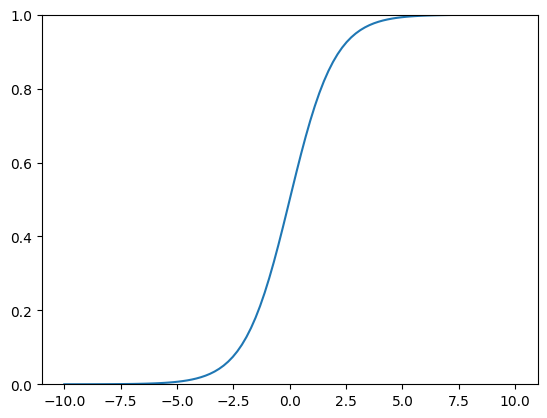

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(-10, 10, 100)
plt.plot(xs, 1 / (1 + np.exp(-1 * xs + 0)), label="P(y=1|x)")

plt.gca().set_ylim(0,1)

None

In [ ]:
import pandas as pd

abalone = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/abalone.tsv", sep="\t")

In [ ]:
abalone_input = abalone[["Rings"]]

In [ ]:
abalone_target = abalone["Sex"] == "M"

In [ ]:
import sklearn.ensemble

In [ ]:
abalone_base = sklearn.ensemble.RandomForestClassifier(n_estimators=100, max_depth=2)
abalone_base.fit(abalone_input, abalone_target)

RandomForestClassifier(max_depth=2)

In [ ]:
import sklearn.calibration

In [ ]:
abalone_platt = sklearn.calibration.CalibratedClassifierCV(abalone_base, cv="prefit", method="sigmoid")
abalone_platt.fit(abalone_input, abalone_target)

CalibratedClassifierCV(cv='prefit',
                       estimator=RandomForestClassifier(max_depth=2))

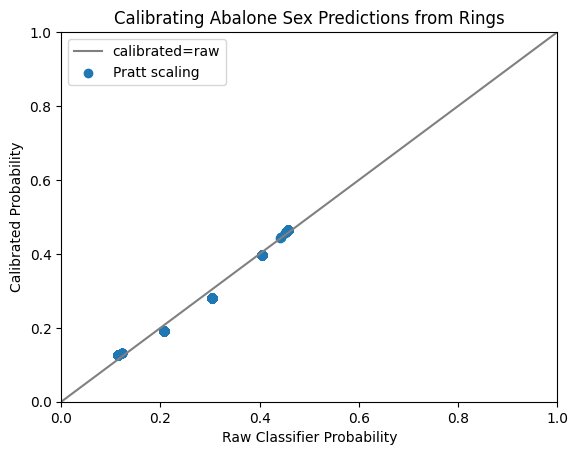

In [ ]:
plt.plot([0, 1], [0, 1], label="calibrated=raw", color="grey")
plt.scatter(abalone_base.predict_proba(abalone_input)[:,1], abalone_platt.predict_proba(abalone_input)[:,1], label="Pratt scaling")
plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.legend()
plt.xlabel("Raw Classifier Probability")
plt.ylabel("Calibrated Probability")
plt.title("Calibrating Abalone Sex Predictions from Rings")
None

In [ ]:
abalone_isotonic = sklearn.calibration.CalibratedClassifierCV(abalone_base, cv="prefit", method="isotonic")
abalone_isotonic.fit(abalone_input, abalone_target)

CalibratedClassifierCV(cv='prefit',
                       estimator=RandomForestClassifier(max_depth=2),
                       method='isotonic')

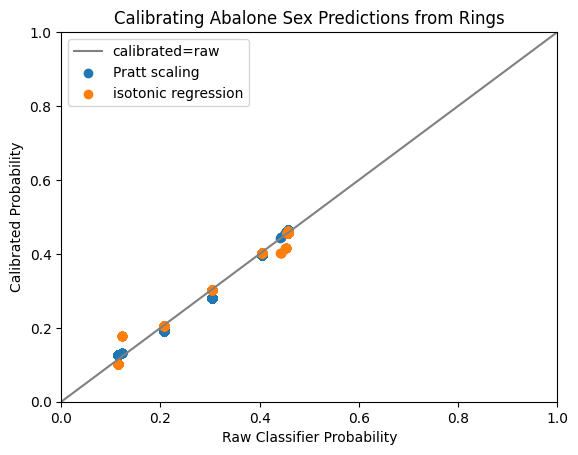

In [ ]:
plt.plot([0, 1], [0, 1], label="calibrated=raw", color="grey")
plt.scatter(abalone_base.predict_proba(abalone_input)[:,1], abalone_platt.predict_proba(abalone_input)[:,1], label="Pratt scaling")
plt.scatter(abalone_base.predict_proba(abalone_input)[:,1], abalone_isotonic.predict_proba(abalone_input)[:,1], label="isotonic regression")
plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.legend()
plt.xlabel("Raw Classifier Probability")
plt.ylabel("Calibrated Probability")
plt.title("Calibrating Abalone Sex Predictions from Rings")
None